DEV MINI PROJECT: PREPROCESSING AND EDA
<br>DELANIE RODRIGUES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Cleaning Dataset1

In [ ]:
df=pd.read_csv("/content/mentalhealth_dirty.csv")
df.head()


,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,25-30,NaN,Business,NaN,Maybe,NaN,Yes,NaN,NaN,NaN,NaN,No,No


In [ ]:
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      851 non-null    object
 1   Gender                   856 non-null    object
 2   Occupation               855 non-null    object
 3   Days_Indoors             840 non-null    object
 4   Growing_Stress           852 non-null    object
 5   Quarantine_Frustrations  851 non-null    object
 6   Changes_Habits           852 non-null    object
 7   Mental_Health_History    854 non-null    object
 8   Weight_Change            856 non-null    object
 9   Mood_Swings              848 non-null    object
 10  Coping_Struggles         855 non-null    object
 11  Work_Interest            848 non-null    object
 12  Social_Weakness          849 non-null    object
dtypes: object(13)
memory usage: 87.8+ KB


Age                        5
Gender                     2
Occupation                 5
Days_Indoors               5
Growing_Stress             5
Quarantine_Frustrations    6
Changes_Habits             5
Mental_Health_History      4
Weight_Change              3
Mood_Swings                8
Coping_Struggles           2
Work_Interest              3
Social_Weakness            4
dtype: int64

In [ ]:
null_counts = df.isnull().sum()
print(null_counts)
print("proportion of null values for each column")
print(df.isnull().sum()/len(df))
print("since for any column proportion of null values is not > 0.5 , we need not drop any column")

Age                        12
Gender                      7
Occupation                  8
Days_Indoors               23
Growing_Stress             11
Quarantine_Frustrations    12
Changes_Habits             11
Mental_Health_History       9
Weight_Change               7
Mood_Swings                15
Coping_Struggles            8
Work_Interest              15
Social_Weakness            14
dtype: int64
proportion of null values for each column
Age                        0.013905
Gender                     0.008111
Occupation                 0.009270
Days_Indoors               0.026651
Growing_Stress             0.012746
Quarantine_Frustrations    0.013905
Changes_Habits             0.012746
Mental_Health_History      0.010429
Weight_Change              0.008111
Mood_Swings                0.017381
Coping_Struggles           0.009270
Work_Interest              0.017381
Social_Weakness            0.016222
dtype: float64
since for any column proportion of null values is not > 0.5 , we need no

In [ ]:
#checking for duplicate rows:
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()
print("Number of duplicate rows:", num_duplicates)



Number of duplicate rows: 17


In [ ]:
print("Number of rows before removing duplicates:", len(df))
df = df.drop_duplicates()

# Print the number of row after removing duplicates
print("Number of rows after removing duplicates:", len((df)))
df.to_csv('mental_health_preprocessed.csv', index=False)
df1=pd.read_csv("/content/mental_health_preprocessed.csv")
duplicate_rows1 = df1.duplicated()
num_duplicates1 = duplicate_rows1.sum()
print("Number of duplicate rows:", num_duplicates1)



Number of rows before removing duplicates: 863
Number of rows after removing duplicates: 846
Number of duplicate rows: 0


In [ ]:
#filling Null values
df['Gender'].fillna('Other', inplace=True)
df['Occupation'].fillna('Unemployed', inplace=True)
df['Social_Weakness'].fillna('Not_Mentioned', inplace=True)
df['Work_Interest'].fillna('Not_Mentioned', inplace=True)
df['Days_Indoors'].fillna('Not_Mentioned', inplace=True)
df['Growing_Stress'].fillna('Not_Mentioned', inplace=True)
df['Weight_Change'].fillna('Not_Mentioned', inplace=True)
df['Mood_Swings'].fillna('Havent_Noticed', inplace=True)
df['Mental_Health_History'].fillna('Not_Mentioned', inplace=True)
df['Changes_Habits'].fillna('Havent_Noticed', inplace=True)
df['Quarantine_Frustrations'].fillna('Not_Mentioned', inplace=True)
df['Coping_Struggles'].fillna('Not_Mentioned', inplace=True)

#dropping rows where Age isnt mentioned
df = df.dropna(subset=['Age'])

null_counts = df.isnull().sum()
print(null_counts)
df.head()
df.to_csv('mental_health_preprocessed.csv', index=False)





Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


In [ ]:
columns_of_interest = ['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits','Mental_Health_History','Weight_Change','Coping_Struggles','Work_Interest','Social_Weakness']
df[columns_of_interest] = df[columns_of_interest].applymap(lambda x: x.upper())

standardized_values = ['YES', 'NO', 'MAYBE', 'NOT_MENTIONED','HAVENT_NOTICED','HIGH','LOW','MEDIUM']

outlier_rows = df[df[columns_of_interest].applymap(lambda x: x.upper() not in standardized_values).any(axis=1)]

print("Outlier values:")
print(outlier_rows)

# Drop filtered rows from DataFrame
cleaned_df = df.drop(outlier_rows.index)

print("\nNumber of rows before filtering:", len(df))
print("Number of rows after filtering:", len(cleaned_df))
cleaned_df.to_csv('mental_health_preprocessed.csv',index=False)


Outlier values:
          Age  Gender Occupation      Days_Indoors Growing_Stress  \
7       16-20  Female   Business  Go out Every day            YE    
65   30-Above    Male     Others         1-14 days             NO   
71   30-Above    Male  Housewife        15-30 days            IDK   
104     16-20    Male  Corporate     Not_Mentioned             NO   
129     25-30  Female     Others  Go out Every day          MAYBE   
189  30-Above    Male  Housewife         1-14 days             NO   
430     20-25  Female  Housewife        31-60 days            YES   

    Quarantine_Frustrations Changes_Habits Mental_Health_History  \
7                       YES          MAYBE                    NO   
65                    MAYBE            NON                   YES   
71                    MAYBE            YES                   YES   
104                    MABE            YES                 MAYBE   
129                      NO          MAYBE                    NO   
189                   M

In [ ]:
df=cleaned_df
print(df['Age'].value_counts())
print(df['Growing_Stress'].value_counts())

Age
30-Above    222
16-20       210
25-30       208
20-25       186
              1
Name: count, dtype: int64
Growing_Stress
YES              299
MAYBE            260
NO               257
NOT_MENTIONED     11
Name: count, dtype: int64


Cleaning Dataset 2

In [ ]:
df2=pd.read_csv("/content/Mental Health Dataset.csv")
df2.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [ ]:
df2.info()
df2.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

Timestamp                  580
Gender                       2
Country                     35
Occupation                   5
self_employed                2
family_history               2
treatment                    2
Days_Indoors                 5
Growing_Stress               3
Changes_Habits               3
Mental_Health_History        3
Mood_Swings                  3
Coping_Struggles             2
Work_Interest                3
Social_Weakness              3
mental_health_interview      3
care_options                 3
dtype: int64

In [ ]:
# Finding the number of null values in each column
null_counts = df2.isnull().sum()

print("Null value counts in each column:")
print(null_counts)

Null value counts in each column:
Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64


As we can see this dataseT has a feature 'self-employed' which has highes number of null count namely '5202' . Imputing this feature is unnecessary as we dont have much use of this feature for our mental health analysis. So we can safely drop the entire column

In [ ]:

df2 = df2.drop(columns=['self_employed'])


In [ ]:
# Finding the number of null values in each column
null_counts = df2.isnull().sum()

print("Null value counts in each column:")
print(null_counts)

Null value counts in each column:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


Cleaning dataset 3 (2015.csv)

In [ ]:
df1=pd.read_csv("/content/2015.csv")
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [ ]:
df1.info()
df1.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Standard Error                   153
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Trust (Government Corruption)    157
Generosity                       158
Dystopia Residual                158
dtype: int64

In [ ]:
# Finding the number of null values in each column
null_counts = df1.isnull().sum()

print("Null value counts in each column:")
print(null_counts)

df1_cleaned = df1.dropna()

print("\nDataFrame after dropping rows with null values:")
print(df1_cleaned)


Null value counts in each column:
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

DataFrame after dropping rows with null values:
         Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
1

Since no null values found this seams to be a clean dataset.

dropping features that are irrelevant to our visualization, the column 'Family' has values which are not clearly explained as to how they are scaled and what do they indicate. also columns like standard error which are more appropriate during model training on this dataset also dropping Generosity, Dystopia Residual

In [ ]:
# Assuming you want to drop columns named 'Column1', 'Column2', and 'Column3'
columns_to_drop = ['Generosity', 'Dystopia Residual', 'Standard Error']

# Dropping columns
df1 = df1.drop(columns=columns_to_drop)

EDA PART

using dataset1

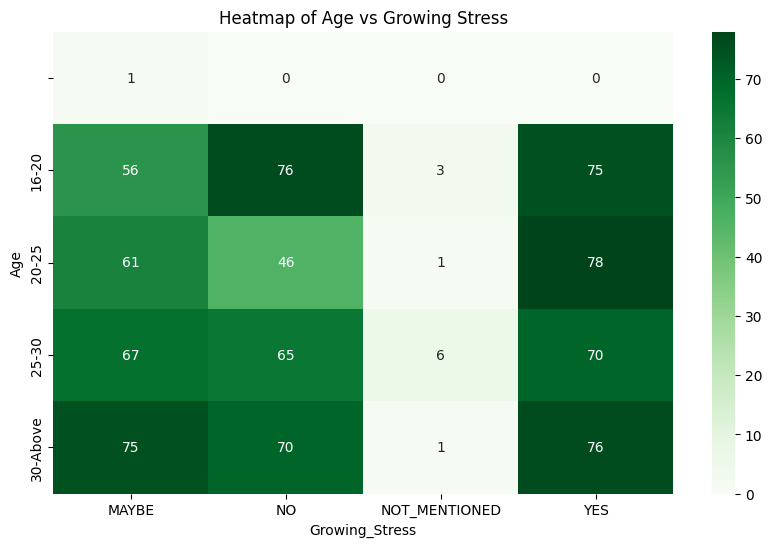

In [ ]:
#showing prevalent patterns using heatmap
heatmap_data = df.groupby(['Age', 'Growing_Stress']).size().unstack(fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='Greens', fmt='g')
plt.title('Heatmap of Age vs Growing Stress')
plt.xlabel('Growing_Stress')
plt.ylabel('Age')
plt.show()
df.head()
df.to_csv('mental_health_preprocessed.csv', index=False)



plotting pie chart of male and female ratio.

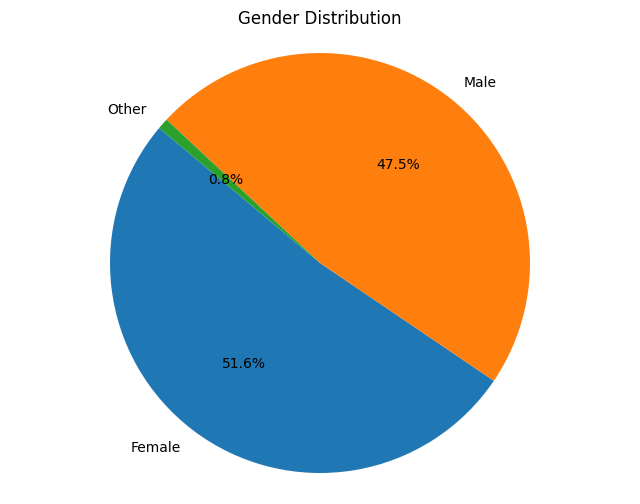

In [ ]:
import matplotlib.pyplot as plt


gender_counts = df['Gender'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


using dataset 3

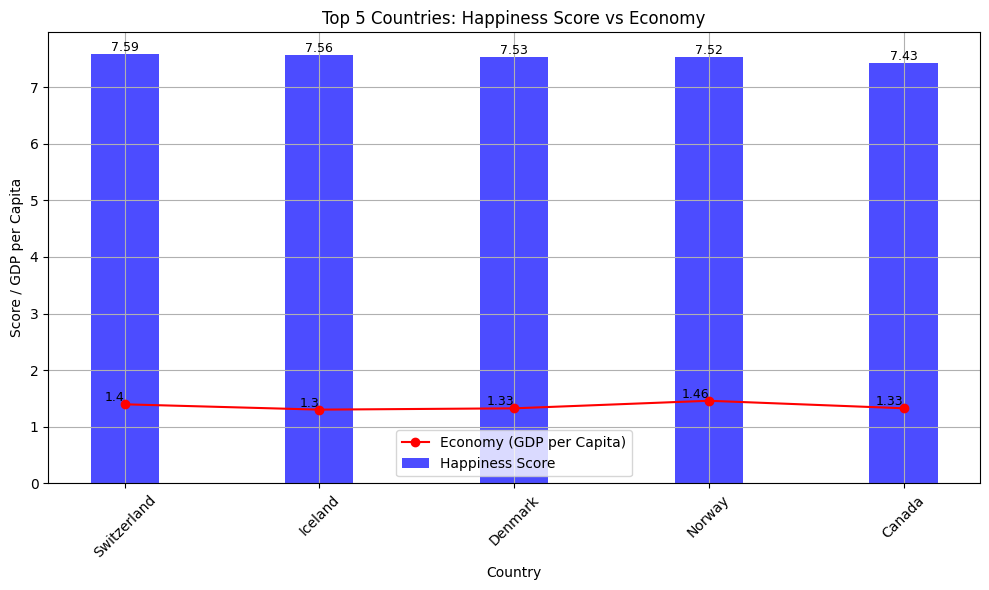

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

top_5_countries = df1.nlargest(5, 'Happiness Score')

# Set the width of the bars
bar_width = 0.35
x_values = np.arange(len(top_5_countries))

# Plotting histogram for Happiness Score
plt.figure(figsize=(10, 6))
bars = plt.bar(x_values, top_5_countries['Happiness Score'], bar_width, alpha=0.7, color='blue', label='Happiness Score')

# Overlaying line graph for Economy
line = plt.plot(x_values, top_5_countries['Economy (GDP per Capita)'], marker='o', color='red', label='Economy (GDP per Capita)')
plt.xticks(x_values, top_5_countries['Country'], rotation=45)
plt.xlabel('Country')
plt.ylabel('Score / GDP per Capita')
plt.title('Top 5 Countries: Happiness Score vs Economy')

# Adding value
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), round(bar.get_height(), 2),
             ha='center', va='bottom', color='black', fontsize=9)

for i, val in enumerate(top_5_countries['Economy (GDP per Capita)']):
    plt.text(x_values[i], val, round(val, 2), ha='right', va='bottom', color='black', fontsize=9)


plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


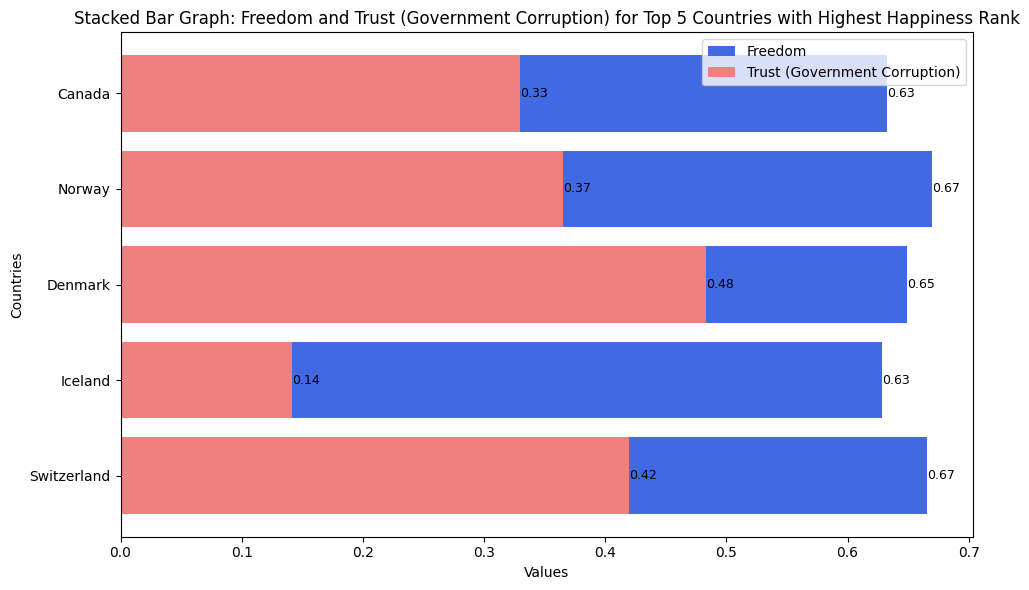

In [ ]:

top_5_countries = df1.nsmallest(5, 'Happiness Rank')

# Extracting necessary data
countries = top_5_countries['Country']
freedom_values = top_5_countries['Freedom']
trust_values = top_5_countries['Trust (Government Corruption)']


bar_positions = range(len(countries))

# Plotting the stacked bar graph
plt.figure(figsize=(10, 6))
bars1 = plt.barh(bar_positions, freedom_values, color='royalblue', label='Freedom')
bars2 = plt.barh(bar_positions, trust_values, color='lightcoral', label='Trust (Government Corruption)')

# Adding labels for each point
for i, bar1 in enumerate(bars1):
    plt.text(bar1.get_width(), bar1.get_y() + bar1.get_height()/2, round(bar1.get_width(), 2), ha='left', va='center', color='black', fontsize=9)

for i, bar2 in enumerate(bars2):
    plt.text(bar2.get_width(), bar2.get_y() + bar2.get_height()/2, round(bar2.get_width(), 2), ha='left', va='center', color='black', fontsize=9)

plt.yticks(bar_positions, countries)
plt.xlabel('Values')
plt.ylabel('Countries')
plt.title('Stacked Bar Graph: Freedom and Trust (Government Corruption) for Top 5 Countries with Highest Happiness Rank')

plt.legend()

plt.tight_layout()
plt.show()



